In [204]:
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

import warnings
warnings.filterwarnings(action='ignore')

# 한글설정
from matplotlib import font_manager
f_path = '/Library/Fonts/NanumGothic.ttf'
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc('font', family = 'NanumGothic')

# #지수표현 안나오게 하기
# pd.options.display.float_format = '{:.1f}'.format
pd.set_option('display.float_format', None)

* 제주도 2차 재난지원금 신청: 8. 24. ~ 10. 11.

"""


* YM : 기준년월 
* SIDO : 지역대분류명 
* SIGUNGU : 지역중분류명 
* FranClass : 소상공인구분 
* Type : 업종명 
* Time : 시간대 
* vTotalSpent : 총사용금액 
* DisSpent : 재난지원금 사용금액 
* NumOfSpent : 총 이용건수 
* NumOfDisSpent : 총 재난지원금 이용건수 
* POINT_X, POINT_Y : X,Y 좌표 
* Ts-DS : 총사용금액 - 재난지원금
* NTS-NDS : 총이용건수-총재난금액 이용건수
* Mts : 총사용금액/총이용건수 (의미없어보이지만)
* Mds : 재난지원금/재난지원금 이용건수
* Time_cut : 심야 새벽 오전 점심 오후 저녁 무승인거래


"""


In [205]:
# 기존에 저장했던 파일 불러오기
# Time을 str형식으로 지정안하고 불러오니 01,02와 1,2(숫자형식)가 섞여서 출력됨
df = pd.read_csv('./dacon_jeju.csv', sep=',', dtype = {"Time": str})
df=df.iloc[:,1:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119429 entries, 0 to 1119428
Data columns (total 18 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   OBJECTID       1119429 non-null  int64  
 1   YM             1119429 non-null  int64  
 2   SIDO           1119429 non-null  object 
 3   SIGUNGU        1119429 non-null  object 
 4   FranClass      1119429 non-null  object 
 5   Type           1119429 non-null  object 
 6   Time           1119429 non-null  object 
 7   TotalSpent     1119429 non-null  int64  
 8   DisSpent       1119429 non-null  int64  
 9   NumofSpent     1119429 non-null  int64  
 10  NumofDisSpent  1119429 non-null  int64  
 11  POINT_X        1119429 non-null  float64
 12  POINT_Y        1119429 non-null  float64
 13  TS-DS          1119429 non-null  int64  
 14  NTS-NDS        1119429 non-null  int64  
 15  Mts            1119429 non-null  float64
 16  Mds            1119429 non-null  float64
 17  Time_cut

In [206]:

df.tail()

,OBJECTID,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,TS-DS,NTS-NDS,Mts,Mds,Time_cut
1119424,280081,202008,제주특별자치도,제주시,영세,편의점,x,13700,0,2,0,950266.5976,1.502458e+06,13700,2,6850.0,0.0,무승인거래
1119425,280082,202008,제주특별자치도,제주시,영세,일반한식,x,56000,0,1,0,950317.5379,1.502258e+06,56000,1,56000.0,0.0,무승인거래
1119426,280083,202008,제주특별자치도,제주시,영세,일반한식,x,28000,0,1,0,950469.1585,1.501909e+06,28000,1,28000.0,0.0,무승인거래
1119427,280084,202008,제주특별자치도,제주시,중소1,중국음식,x,46000,0,3,0,950574.6388,1.500760e+06,46000,3,15333.0,0.0,무승인거래
1119428,280085,202008,제주특별자치도,제주시,영세,서양음식,x,9000,0,1,0,950565.5176,1.502659e+06,9000,1,9000.0,0.0,무승인거래


In [207]:
# 재난지원금 사용금액이 없는 수는 824705곳
len(df[df['DisSpent'] == 0])

824705

In [194]:
#중복된 위도경도를 확인해보고
df['Point_xy'].value_counts().head(15)

KeyError: 'Point_xy'

In [195]:
a, b = 909381.4713000003,1502761.0913999993
a, b = transform(proj_ITRF, proj_WGS84, a, b)
a, b

(126.52427851055405, 33.51290574138535)

In [196]:
url = "https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?x={}&y={}".format(a,b)
api_test = requests.get(url, headers=headers)
url_text = json.loads(api_test.text)
dongmyeon = url_text['documents'][0]['region_3depth_name']
ri = url_text['documents'][0]['region_4depth_name']
dongmyeon + ' ' + ri

'일도일동 '

In [197]:
# 좌표 동이한 곳이 많네..정확한 좌표는 아닌가봄(세부적인 주소가 아닐수도))
# 그냥 한번 검색해봄 
df_point_tem = df[df['Point_xy'] == '909381.4713000003,1502761.0913999993']
df_point_tem.groupby(['Type'])[['TotalSpent', 'DisSpent']].sum().sort_values('TotalSpent', ascending=False)

KeyError: 'Point_xy'

In [198]:
print(df['SIDO'].unique())
print(df['SIGUNGU'].unique())
print(df['FranClass'].unique())
print(df['Type'].unique())
# print(df['Time'].unique())
# print(df['TotalSpent'].unique())
# print(df['DisSpent'].unique())
# print(df['NumofSpent'].unique())
# print(df['NumofDisSpent'].unique())

#Type은 묶어줘야 할 것 같음
df_type_count = pd.DataFrame(df['Type'].value_counts())

['제주특별자치도']
['제주시' '서귀포시']
['영세' '중소1' '중소' '중소2' '일반']
['일반한식' '단란주점' '편의점' '주점' '스넥' '콘도' '일식회집' '기타음료식품' '기타숙박업' '노래방' '기타잡화'
 '중국음식' '당구장' '서양음식' '슈퍼마켓' '유아원' '유흥주점' '기타레져업' '농축수산품' '골프경기장' '세탁소'
 '위탁급식업' '기타유통업' '문화취미기타' '주유소' '스포츠레져용품' '구내매점' '특급호텔' '볼링장' '신발'
 '기타회원제형태업소' '제과점' '피부미용실' '칵테일바' '골프용품' '사무서비스' 'LPG' '세차장' '영화관' '주차장'
 '종합병원' '사우나' '학원(회원제형태)' '화장품' '헬스크럽' '의원' '2급호텔' '독서실' '주류판매점' '골프연습장'
 '기타대인서비스' '성인용품점' '화물운송' '애완동물' '안마스포츠마사지' '정장' '동물병원' '약국' '상품권'
 '인터넷Mall' '항공사' '레져업소(회원제형태)' '1급호텔' '침구수예점' '악세사리' '보관창고업' '기념품점' '화원'
 '미용원' '종합용역' '목재석재철물' '인터넷종합Mall' '대형할인점' '기타연료' '조명기구' '문구용품' '사진관'
 '자동차정비' '컴퓨터' '조세서비스' '기타의료기관및기기' '유류판매' '기계공구' '보일러펌프' '기타업종' '미곡상'
 '건축요업품' '렌트카' '소프트웨어' '택시' '수영장' '비료농약사료종자' '농축협직영매장' '기타건축자재' '농기계'
 '정육점' '페인트' '스포츠의류' '양품점' '자동차부품' '기타가구' '관광여행' '이용원' '면세점' '종합레져타운'
 '일반서적' '냉열기기' '주방용식기' '인테리어' '민예공예품' '기타농업관련' '캐쥬얼의류' '기타건강식' '기타운송'
 '연쇄점' '옷감직물' '한의원' '여객선' '기타수리서비스' '농협하나로클럽' '기타전기제품' '가전제품' '기타용역서비스'
 '일반가구' '기능학원' '카페트커텐천막' 

In [199]:
df_type_count.loc['면세점']

Type    186
Name: 면세점, dtype: int64

In [200]:
# X시는 뭘까? =미승인 자동결제 4%정도
# X는 빼줘도 되지 않을까
len(df[df['Time']=='x']) / 1119429

0.041976757793482214

In [201]:
YM : 기준년월
SIDO : 지역대분류명
SIGUNGU : 지역중분류명
FranClass : 소상공인구분
Type : 업종명
Time : 시간대
TotalSpent : 총사용금액
DisSpent : 재난지원금 사용금액
NumOfSpent : 총 이용건수
NumOfDisSpent : 총 재난지원금 이용건수
POINT_X, POINT_Y : X,Y 좌표

SyntaxError: invalid syntax (<ipython-input-201-4d80907583b2>, line 8)

<AxesSubplot:xlabel='Time', ylabel='TotalSpent'>

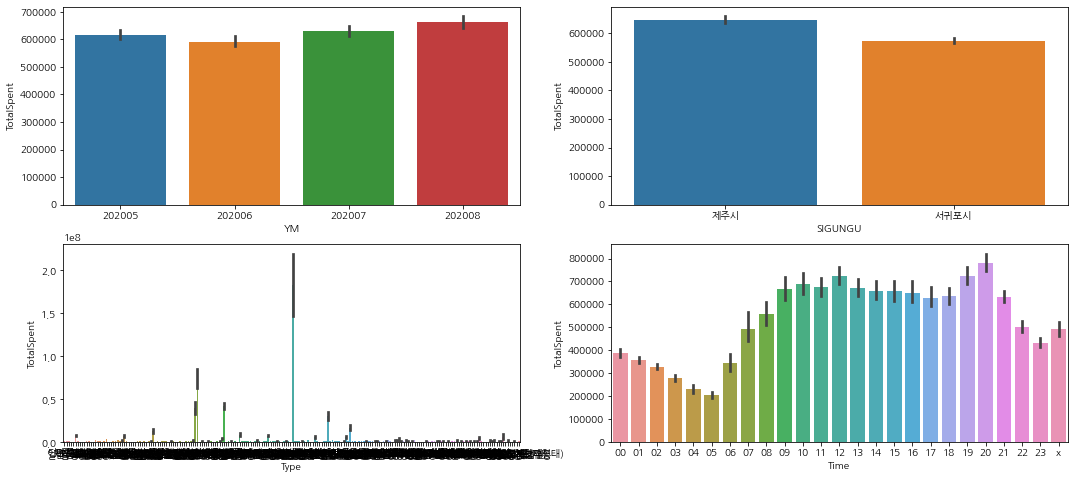

In [202]:
# 총사용금액으로 정리해보기

figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)

sns.barplot(data=df, x="YM", y="TotalSpent", ax=ax1)
sns.barplot(data=df, x="SIGUNGU", y="TotalSpent", ax=ax2)
sns.barplot(data=df, x="Type", y="TotalSpent", ax=ax3)
sns.barplot(data=df, x="Time", y="TotalSpent", ax=ax4)



In [15]:
# 총사용금액은 7,8월은 휴가시즌, 5월은 가정의 달이라 높은 것 같음
# 식사시간에 사용금액이 높다
# 저녁시간에 사용금액이 더 많다.
# 제주시 서귀포시 총사용금액 그래프가 이상하다...더 많이 차이가 나야하는데..

In [50]:
# 저 치솟은 부분은 일반한식
df.groupby('Type')['TotalSpent'].sum().sort_values(ascending=False)

Type
일반한식       119780775296
슈퍼마켓        54681352429
편의점         39477389815
면세점         33854087062
주유소         33649145125
               ...     
카메라             2489000
정보서비스           1128200
기타광학품           1005100
기타비영리유통          450000
골동품점             280000
Name: TotalSpent, Length: 206, dtype: int64

In [16]:
df_si_tot = pd.DataFrame(df.groupby('SIGUNGU')['TotalSpent'].sum())
df_si_tot.reset_index(inplace=True)
df_si_tot['pop'] = df_si_tot['SIGUNGU'].map({'제주시':492072, '서귀포시':181929})
df_si_tot['Mean'] = round(df_si_tot['TotalSpent']/df_si_tot['pop'],0)
df_si_tot

,SIGUNGU,TotalSpent,pop,Mean
0,서귀포시,184322022708,181929,1013154.0
1,제주시,515888007651,492072,1048399.0


In [17]:
# 1인당 총사용금액을 보면 비슷함(하지만...총 사용금액은 크게 중요하지 않음)(관광객도 포함이니깐)

<AxesSubplot:xlabel='Time', ylabel='DisSpent'>

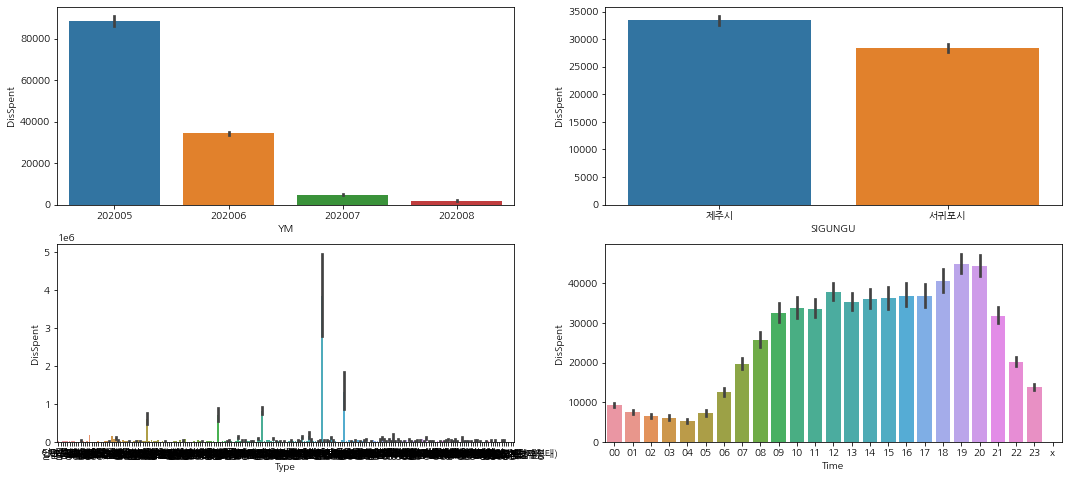

In [18]:
# 재난사용금액 그래프로 그려보기

figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)

sns.barplot(data=df, x="YM", y="DisSpent", ax=ax1)
sns.barplot(data=df, x="SIGUNGU", y="DisSpent", ax=ax2)
sns.barplot(data=df, x="Type", y="DisSpent", ax=ax3)
sns.barplot(data=df, x="Time", y="DisSpent", ax=ax4)

In [19]:
# 재난지원금 5월에 많고 떨어진다(5월에 받아서...)
# 제주시가 더 많이 소비(근데 재난지원금 어디서든지 쓸수 있어서...)
# 시간별 소비는 재난지원금이나 총사용금액이나 비슷함

<AxesSubplot:xlabel='Time', ylabel='TotalSpent'>

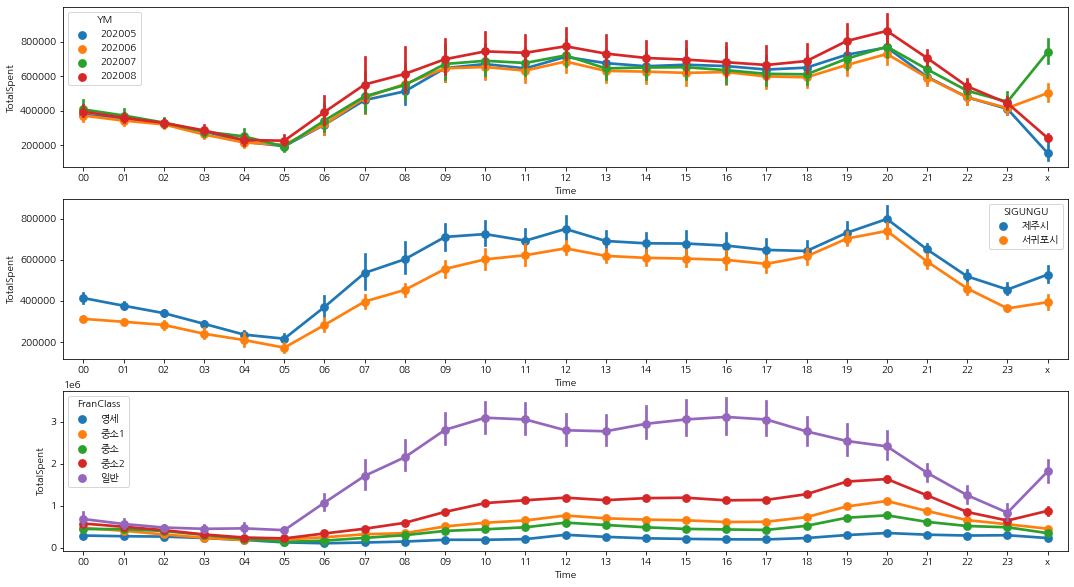

In [20]:
# 시간대별로 총사용금액 비교해보기

fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18,10)

sns.pointplot(data=df, x="Time", y="TotalSpent",hue='YM', ax=ax1)
sns.pointplot(data=df, x="Time",y= df["TotalSpent"], hue="SIGUNGU", ax=ax2)
# sns.pointplot(data=df, x="Time", y="TotalSpent", hue="Type", ax=ax3)
sns.pointplot(data=df, x="Time", y="TotalSpent", hue="FranClass", ax=ax3)


In [21]:
# 일반에서 떨어질때 다른 곳이 오름 점심 시간을 피해서 장을 보러가는게(마트) 아닐까?
# 식사시간에 사용금액이 많다

In [58]:
# 왜 7월에만 x시가 높지?
df_07[df_07['Time'] =='x'].groupby('Type')['TotalSpent'].sum().sort_values(ascending=False)

Type
슈퍼마켓       1972356095
일반한식       1333715094
농축협직영매장     920044820
보습학원        778188983
편의점         699019782
              ...    
당구장             31200
윤활유전문판매         21000
신변잡화수리          20000
기타교통수단          15000
레져용품수리          10810
Name: TotalSpent, Length: 164, dtype: int64

In [22]:
df_si_dis = pd.DataFrame(df.groupby('SIGUNGU')['DisSpent'].sum())
df_si_dis.reset_index(inplace=True)
df_si_dis['pop'] = df_si_dis['SIGUNGU'].map({'제주시':492072, '서귀포시':181929})
df_si_dis['Mean'] = round(df_si_dis['DisSpent']/df_si_dis['pop'],0)
df_si_dis

# 1인당 사용금액은 받는 사람들 마다 금액이 틀린데 이 분석은 아닌것 같긴하지만

,SIGUNGU,DisSpent,pop,Mean
0,서귀포시,9092931318,181929,49981.0
1,제주시,26643435679,492072,54145.0


In [23]:
pivot_df_tot = pd.pivot_table(df,'TotalSpent','Type', 'Time', 'count'  )
pivot_df_tot


Time,00,01,02,03,04,05,06,07,08,09,...,15,16,17,18,19,20,21,22,23,x
Type,,,,,,,,,,,,,,,,,,,,,
1급호텔,6.0,3.0,4.0,6.0,5.0,3.0,7.0,12.0,11.0,11.0,...,15.0,15.0,16.0,14.0,15.0,16.0,16.0,13.0,11.0,1.0
2급호텔,29.0,28.0,23.0,17.0,15.0,8.0,16.0,16.0,18.0,21.0,...,30.0,30.0,38.0,42.0,48.0,45.0,41.0,32.0,35.0,4.0
CATV,nan,nan,nan,nan,nan,nan,nan,nan,3.0,4.0,...,4.0,4.0,4.0,3.0,1.0,nan,nan,nan,nan,1.0
DVD음반테이프판매,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.0,...,11.0,12.0,9.0,7.0,8.0,7.0,1.0,nan,nan,9.0
LPG,43.0,25.0,21.0,22.0,26.0,77.0,161.0,363.0,436.0,493.0,...,480.0,486.0,483.0,411.0,278.0,158.0,124.0,96.0,59.0,273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
화랑,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.0,...,9.0,9.0,6.0,9.0,5.0,6.0,3.0,2.0,nan,4.0
화물운송,17.0,16.0,13.0,7.0,5.0,8.0,18.0,43.0,81.0,94.0,...,103.0,100.0,82.0,63.0,37.0,36.0,26.0,16.0,19.0,6.0
화방표구점,nan,nan,nan,nan,nan,nan,nan,nan,1.0,7.0,...,12.0,11.0,18.0,6.0,3.0,2.0,nan,nan,nan,3.0


In [24]:
# 오전 10시에 일반이 가장 높은 이유는 뭐지?
frand_df = df[df['FranClass']=='일반'].groupby(['Time','Type'])['TotalSpent'].sum()
frand_df=pd.DataFrame(frand_df).sort_values('TotalSpent', ascending=False)
frand_df.reset_index(inplace=True)
frand_df
frand_df[frand_df['Time']=='10'].head(10)
# 면세점,마트(sum)
# 일반한식,마트(count)
# 주유소(관광객들이 많으니깐?)

,Time,Type,TotalSpent
27,10,면세점,2042548965
28,10,슈퍼마켓,2035149974
31,10,주유소,2002868805
44,10,종합병원,1734857960
66,10,농축협직영매장,1289913129
73,10,콘도,1175447683
93,10,특급호텔,864428032
104,10,약국,688270509
108,10,농협하나로클럽,666826310
114,10,대형할인점,633654900


<AxesSubplot:xlabel='Time', ylabel='DisSpent'>

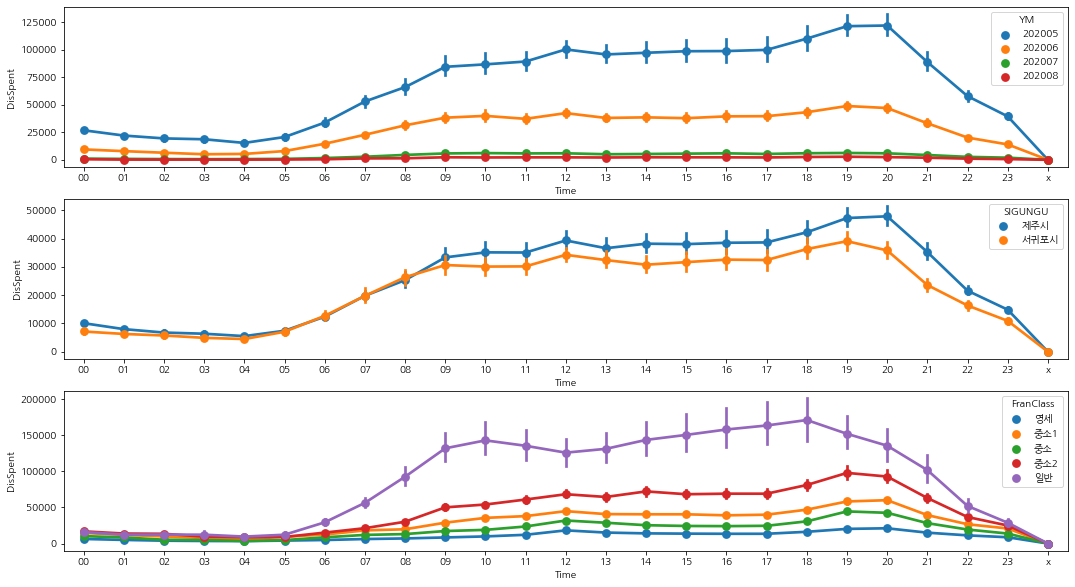

In [25]:
# 재난지원금 사용 그래프로 비교해보기
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18,10)


sns.pointplot(data=df, x="Time", y="DisSpent",hue='YM', ax=ax1)
sns.pointplot(data=df, x="Time",y= df["DisSpent"], hue="SIGUNGU", ax=ax2)
# sns.pointplot(data=df, x="Time", y="TotalSpent", hue="Type", ax=ax3)

sns.pointplot(data=df, x="Time", y="DisSpent", hue="FranClass", ax=ax3)

In [26]:
# 일반도 재난지원금이 사용 가능하군

In [64]:
# 일반 10/18시에 (재난 지원금)장보러 많이 감_비슷한 패턴
ds_fran_df = df[df['FranClass']=='일반'].groupby(['Time','Type'])['DisSpent'].sum()
ds_frand_df=pd.DataFrame(ds_fran_df).sort_values('DisSpent', ascending=False)
ds_frand_df.reset_index(inplace=True)
ds_frand_df[ds_frand_df['Time']=='18'].head(5)

,Time,Type,DisSpent
1,18,슈퍼마켓,398284475
6,18,농축협직영매장,278845296
33,18,농협하나로클럽,125409437
39,18,주유소,116622966
62,18,일반한식,54899838


In [65]:
# 역시 밥먹으러...
ds_frand_df2 = df[df['FranClass']=='중소2'].groupby(['Time','Type'])['DisSpent'].sum()
ds_frand_df2=pd.DataFrame(ds_frand_df2).sort_values('DisSpent', ascending=False)
ds_frand_df2.reset_index(inplace=True)
ds_frand_df2[ds_frand_df2['Time']=='19'].head(10)


,Time,Type,DisSpent
0,19,일반한식,113888333
4,19,슈퍼마켓,83557010
27,19,스포츠레져용품,36835900
62,19,편의점,17954670
68,19,서양음식,14734765
73,19,주유소,13431457
92,19,일식회집,10893080
106,19,안경,9691540
148,19,기타잡화,7123454
151,19,약국,6958030


<AxesSubplot:xlabel='Time', ylabel='NumofSpent'>

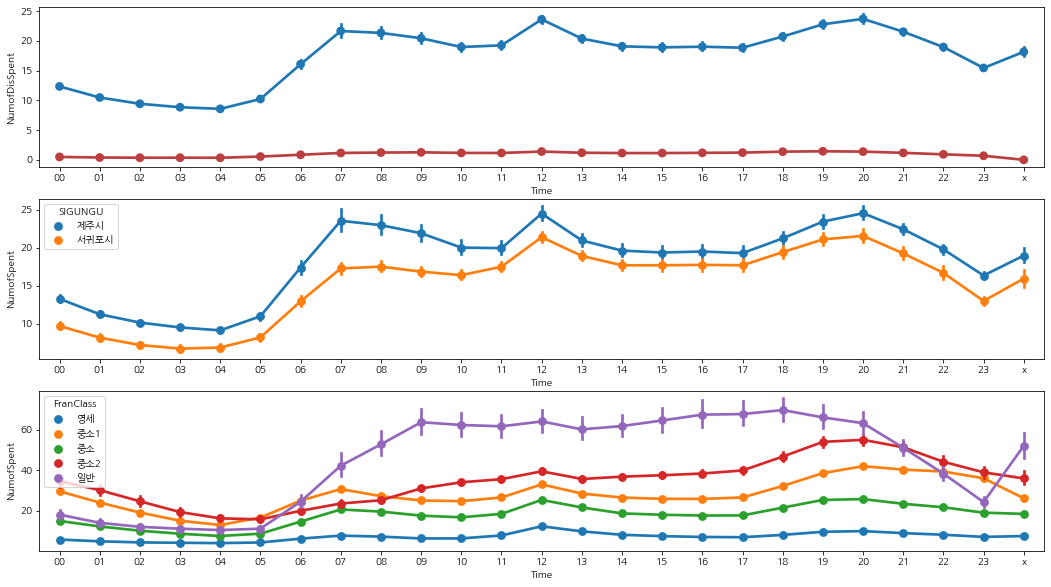

In [66]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18,10)

sns.pointplot(data=df, x="Time", y="NumofSpent", ax=ax1)
sns.pointplot(data=df, x="Time", y="NumofDisSpent", ax=ax1,color="#bb3f3f")

sns.pointplot(data=df, x="Time",y= "NumofSpent", hue="SIGUNGU", ax=ax2)

# sns.pointplot(data=df, x="Time", y="TotalSpent", hue="Type", ax=ax3)

sns.pointplot(data=df, x="Time", y="NumofSpent", hue="FranClass", ax=ax3)




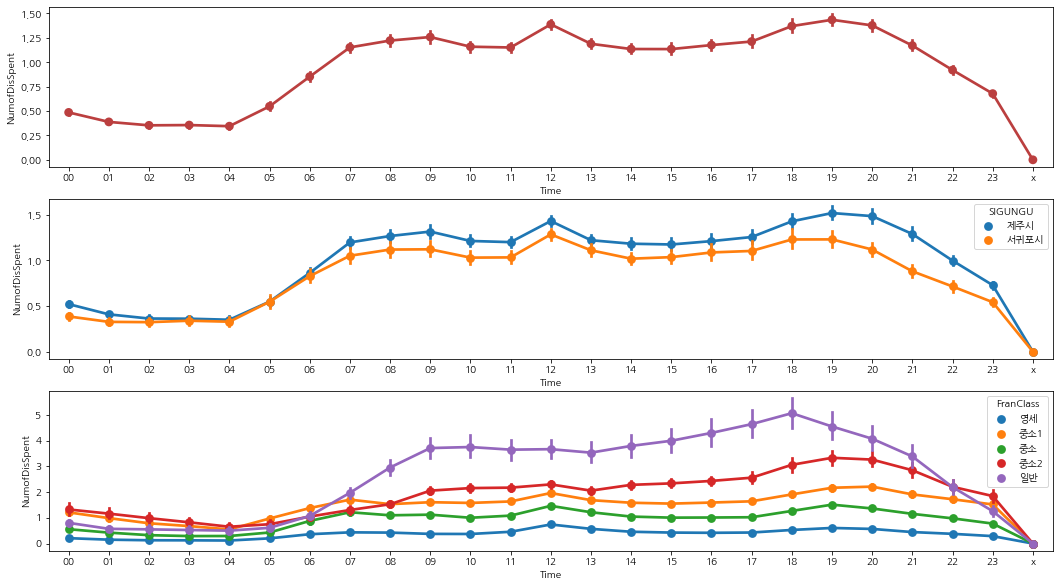

In [67]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18,10)


sns.pointplot(data=df, x="Time", y="NumofDisSpent", ax=ax1,color="#bb3f3f")

sns.pointplot(data=df, x="Time",y= "NumofDisSpent", hue="SIGUNGU", ax=ax2)
# sns.pointplot(data=df, x="Time", y="TotalSpent", hue="Type", ax=ax3)


sns.pointplot(data=df, x="Time", y="NumofDisSpent", hue="FranClass", ax=ax3);


In [31]:
# 역시 식사를 하는 시간에 많이 소비하고 횟수도 증가함

In [32]:
df_06=df[df['YM']==202006]
df_07=df[df['YM']==202007]
df_08=df[df['YM']==202008]
df_05=df[df['YM']==202005]

<AxesSubplot:xlabel='Time', ylabel='DisSpent'>

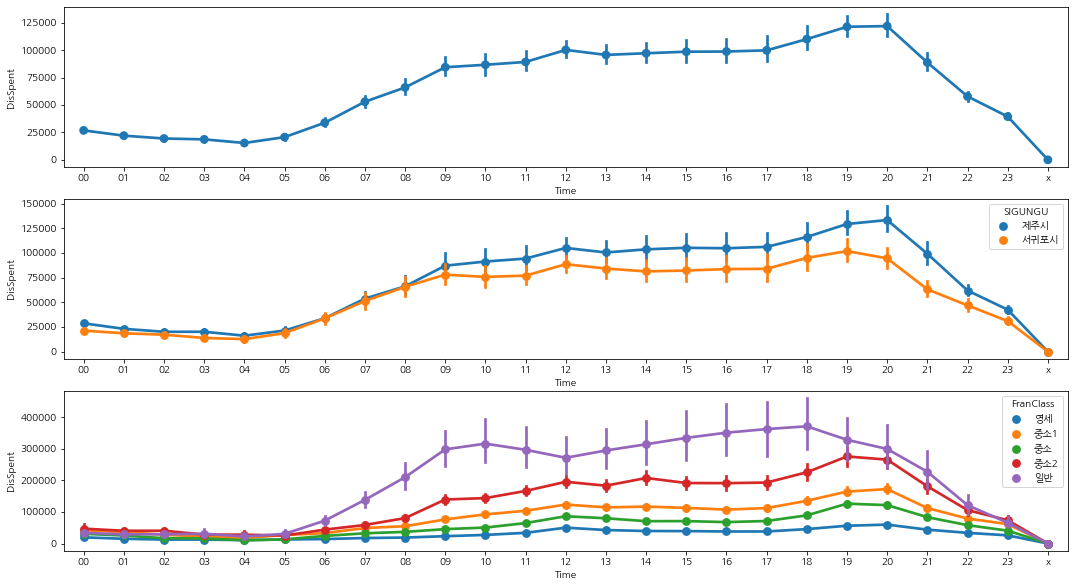

In [33]:
# 5월 그래프만 따로 분석해보기
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18,10)


sns.pointplot(data=df_05, x="Time", y="DisSpent", ax=ax1)
sns.pointplot(data=df_05, x="Time",y= "DisSpent", hue="SIGUNGU", ax=ax2)
# sns.pointplot(data=df, x="Time", y="TotalSpent", hue="Type", ax=ax3)

sns.pointplot(data=df_05, x="Time", y="DisSpent", hue="FranClass", ax=ax3)

In [34]:
# 재난지원금이 일반매장에서도 많이 사용되었음
# 하나로클럽은 대형마트(?)지만 재난지원금 사용이 되어서 많이 사용하는 것 같음
# 언제든지 시간대별로 총재난지원금 사용금액은 슈퍼마켓, 농축협직영매장, 농협하나로클럽, 주유소가 상위권을 차지함

In [35]:
df_05_pivot = df_05.pivot_table('DisSpent', 'Type', 'Time', np.sum)
pd.options.display.max_columns = len(df_05_pivot.columns)

df_05_pivot

Time,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23,x
Type,,,,,,,,,,,,,,,,,,,,,,,,,
1급호텔,0.0,0.0,nan,0.0,0.0,0.0,14000.0,9900.0,162000.0,0.0,0.0,0.0,0.0,100000.0,0.0,100000.0,17000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan
2급호텔,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,35000.0,50000.0,0.0,165000.0,20000.0,224300.0,61500.0,128500.0,0.0,172000.0,0.0,0.0,289000.0,51000.0,0.0,90000.0,0.0
CATV,nan,nan,nan,nan,nan,nan,nan,nan,0.0,2146220.0,136160.0,123740.0,0.0,450330.0,26080.0,68720.0,251760.0,139680.0,47730.0,33600.0,nan,nan,nan,nan,nan
DVD음반테이프판매,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,72000.0,154000.0,126000.0,57000.0,71000.0,31000.0,565000.0,34000.0,48000.0,0.0,nan,nan,nan
LPG,155030.0,199744.0,30000.0,0.0,90492.0,637763.0,1899861.0,7038504.0,11733929.0,13848860.0,16908028.0,15126851.0,12280666.0,15225799.0,16235038.0,15913334.0,15345356.0,14552767.0,12872966.0,6796752.0,4174774.0,2936493.0,1516473.0,303522.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
화랑,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,10000.0,0.0,120000.0,180000.0,20000.0,135000.0,0.0,23000.0,0.0,0.0,9000.0,0.0,nan,nan,nan
화물운송,37000.0,3300.0,307000.0,0.0,0.0,0.0,2271248.0,841080.0,482350.0,874660.0,1739780.0,1509760.0,1656370.0,1635900.0,679390.0,2902990.0,1665300.0,178800.0,1074000.0,28600.0,3300.0,44640.0,77100.0,46640.0,0.0
화방표구점,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,140000.0,678480.0,366000.0,0.0,100000.0,0.0,160000.0,0.0,nan,nan,150000.0,nan,nan,nan,nan


In [36]:
def df_time(a,b,c):
    """a는 Type 중 하나를 입력
    b는 DisSpent or TotalSpent
    c는 시간을 문자열로"""
    df_temp= df[df['FranClass']==a].groupby(['Time','Type'])[b].sum()
    df_temp=pd.DataFrame(df_temp).sort_values(b, ascending=False)
    df_temp.reset_index(inplace=True)
    return df_temp[df_temp['Time']==c].reset_index().head(15)

In [37]:
# 전체 시간별, Type별 상위 15개 총사용금액을 보여줌  
df_total=[]
for i in range(24):
    if i < 10:
        i= '0'+ str(i)
        df_temp = df_time('일반', 'TotalSpent', i)
        df_total.append(df_temp)
    else:
        df_temp = df_time('일반', 'TotalSpent', str(i))
        df_total.append(df_temp)

pd.options.display.max_columns = len(pd.concat(df_total, axis=1).drop(['index'], axis=1).columns)    
pd.concat(df_total, axis=1).drop(['index'], axis=1)

,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent,Time,Type,TotalSpent
0,00,인터넷Mall,240513708,01,유흥주점,141732541,02,유흥주점,109104233,03,유흥주점,82123440,04,주유소,67780498,05,주유소,142229957,06,주유소,576510055,07,주유소,1187374114,08,주유소,1638749784,09,주유소,1897625470,10,면세점,2042548965,11,면세점,2323183870,12,면세점,2819389960,13,면세점,2710893593,14,면세점,2820576875,15,면세점,3255753865,16,면세점,3566947245,17,슈퍼마켓,3513963903,18,슈퍼마켓,3404391992,19,슈퍼마켓,2695438479,20,슈퍼마켓,2178100054,21,슈퍼마켓,1788309214,22,슈퍼마켓,1147458777,23,인터넷Mall,409874427
1,00,항공사,207568300,01,인터넷Mall,134106140,02,일반한식,62478306,03,슈퍼마켓,40874620,04,유흥주점,49341750,05,콘도,51709954,06,면세점,374592550,07,면세점,1048981340,08,면세점,1357449480,09,슈퍼마켓,1691175703,10,슈퍼마켓,2035149974,11,주유소,2006790439,12,골프경기장,2173541576,13,슈퍼마켓,2253334859,14,슈퍼마켓,2571540635,15,슈퍼마켓,2901242363,16,슈퍼마켓,3358047871,17,면세점,2916795642,18,면세점,2368435390,19,면세점,2334286847,20,면세점,1922705276,21,대형할인점,1230357130,22,대형할인점,744883620,23,슈퍼마켓,390206895
2,00,일반한식,138687540,01,항공사,101958200,02,인터넷Mall,51352731,03,주유소,37352377,04,콘도,40147111,05,슈퍼마켓,49116390,06,골프경기장,327035360,07,슈퍼마켓,517127430,08,슈퍼마켓,973719164,09,면세점,1689285439,10,주유소,2002868805,11,슈퍼마켓,1989893604,12,슈퍼마켓,2027344294,13,주유소,2044855411,14,주유소,2110007687,15,주유소,2120249848,16,주유소,2179376296,17,농축협직영매장,2297488453,18,농축협직영매장,2201327840,19,일반한식,1683854610,20,일반한식,1834075409,21,일반한식,1063636495,22,인터넷Mall,504076981,23,항공사,300504944
3,00,유흥주점,137742623,01,일반한식,95902576,02,슈퍼마켓,51274880,03,일반한식,36504560,04,슈퍼마켓,35392200,05,유흥주점,35388000,06,슈퍼마켓,125220980,07,골프경기장,486028093,08,농축협직영매장,535898508,09,종합병원,1123267880,10,종합병원,1734857960,11,종합병원,1501366561,12,주유소,1917755350,13,골프경기장,1861359929,14,농축협직영매장,1570916671,15,농축협직영매장,1786973112,16,농축협직영매장,2066114416,17,주유소,2155223130,18,주유소,1948148027,19,농축협직영매장,1662807450,20,대형할인점,1384870530,21,농축협직영매장,602696640,22,항공사,425365456,23,일반한식,238253371
4,00,편의점,101902310,01,슈퍼마켓,72569350,02,단란주점,47534000,03,콘도,30285456,04,종합병원,23003030,05,편의점,28145340,06,화물운송,115070640,07,콘도,177330220,08,종합병원,436501790,09,농축협직영매장,969396584,10,농축협직영매장,1289913129,11,골프경기장,1402932788,12,일반한식,1321209966,13,대형할인점,1338434320,14,대형할인점,1528453520,15,대형할인점,1727411440,16,대형할인점,1806708670,17,골프경기장,1905948523,18,대형할인점,1597892070,19,대형할인점,1424748940,20,농축협직영매장,1224768010,21,주유소,568669054,22,일반한식,407309164,23,편의점,182517078
5,00,슈퍼마켓,101505600,01,단란주점,72062623,02,항공사,40334400,03,편의점,28209100,04,일반한식,20112550,05,인터넷Mall,24885807,06,콘도,94380349,07,편의점,121164180,08,콘도,395021305,09,콘도,741956078,10,콘도,1175447683,11,농축협직영매장,1293302021,12,대형할인점,1241251830,13,농축협직영매장,1316302592,14,골프경기장,1093914137,15,농협하나로클럽,892175870,16,골프경기장,1070914234,17,대형할인점,1787452730,18,골프경기장,1578041424,19,주유소,1328256199,20,주유소,866954093,21,편의점,519653351,22,편의점,319044700,23,유흥주점,136125800
6,00,단란주점,66436700,01,편의점,65575670,02,편의점,39572480,03,항공사,25883500,04,인터넷Mall,19368562,05,종합병원,22111280,06,특급호텔,61084014,07,특급호텔,103627521,08,골프경기장,332189806,09,약국,568008308,10,특급호텔,864428032,11,대형할인점,1114305690,12,농축협직영매장,1187242348,13,일반한식,1238897900,14,일반한식,901088247,15,특급호텔,770928220,16,농협하나로클럽,948704700,17,농협하나로클럽,982203990,18,일반한식,1048881082,19,농협하나로클럽,683889190,20,편의점,561890220,21,인터넷Mall,476498233,22,주유소,218218870,23,주유소,100445883
7,00,기타숙박업,64158917,01,주점,37400900,02,종합병원,39089240,03,인터넷Mall,25088233,04,편의점,19199840,05,항공사,21371400,06,편의점,60045010,07,기타건축자재,101451607,08,농협하나로클럽,249346080,09,농협하나로클럽,559816760,10,약국,688270509,11,콘도,1014255083,12,농협하나로클럽,660970410,13,농협하나로클럽,695344960,14,특급호텔,879329118,15,인터넷Mall,734197312,16,특급호텔,672896730,17,특급호텔,664049305,18,농협하나로클럽,877695300,19,골프경기장,580515140,20,농협하나로

In [38]:
def df_05_time(a,b,c):
    """a는 Type 중 하나를 입력
    b는 DisSpent or TotalSpent
    c는 시간을 문자열로"""
    df= df_05[df_05['FranClass']==a].groupby(['Time','Type'])[b].sum()
    df=pd.DataFrame(df).sort_values(b, ascending=False)
    df.reset_index(inplace=True)
    return df[df['Time']==c].reset_index().head(15)

In [39]:
# 5월 시간별, Type별 상위 15개 재난지원금 총사용금액을 보여줌  
df_total=[]
for i in range(24):
    if i < 10:
        i = '0' + str(i)
        df_temp_05 = df_05_time('일반', 'DisSpent', i)
        df_total.append(df_temp_05)
    else:
        df_temp_05 = df_05_time('일반', 'DisSpent', str(i))
        df_total.append(df_temp_05)
pd.options.display.max_columns = len(pd.concat(df_total, axis=1).drop(['index'], axis=1).columns)    
pd.concat(df_total, axis=1).drop(['index'], axis=1)
 

,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent
0,00,일반한식,6228260,01,일반한식,4225990,02,슈퍼마켓,2716856,03,일반한식,2375400,04,슈퍼마켓,1398250,05,주유소,2586780,06,주유소,20067696,07,주유소,42369212,08,주유소,58214873,09,슈퍼마켓,86379040,10,슈퍼마켓,121146968,11,슈퍼마켓,140693968,12,슈퍼마켓,138044332,13,슈퍼마켓,164914286,14,슈퍼마켓,183335396,15,슈퍼마켓,213901534,16,슈퍼마켓,239168915,17,슈퍼마켓,268049993,18,슈퍼마켓,266858324,19,슈퍼마켓,207632790,20,슈퍼마켓,161801788,21,슈퍼마켓,134136768,22,슈퍼마켓,78579453,23,슈퍼마켓,23799490
1,00,슈퍼마켓,3468580,01,슈퍼마켓,2748720,02,일반한식,2458730,03,슈퍼마켓,2187050,04,대형할인점,1004650,05,슈퍼마켓,2037440,06,슈퍼마켓,6163680,07,슈퍼마켓,27583720,08,슈퍼마켓,52579452,09,주유소,82941746,10,농축협직영매장,101974539,11,농축협직영매장,110167231,12,농축협직영매장,108702833,13,농축협직영매장,120177630,14,농축협직영매장,131862400,15,농축협직영매장,150410751,16,농축협직영매장,169568153,17,농축협직영매장,182140772,18,농축협직영매장,177635138,19,농축협직영매장,127310903,20,농축협직영매장,95223627,21,농축협직영매장,48010040,22,일반한식,18924935,23,일반한식,12042990
2,00,편의점,2994933,01,편의점,2173620,02,편의점,1637100,03,대형할인점,1480340,04,일반한식,775100,05,편의점,1222080,06,편의점,2434080,07,농축협직영매장,5128020,08,농축협직영매장,32764289,09,농축협직영매장,72402766,10,주유소,88565476,11,주유소,85891142,12,주유소,76990084,13,주유소,85271632,14,주유소,96579793,15,주유소,95116878,16,주유소,91109300,17,농협하나로클럽,95140610,18,농협하나로클럽,85842392,19,일반한식,70199131,20,일반한식,78186899,21,일반한식,41102158,22,편의점,11370610,23,편의점,5883440
3,00,대형할인점,2582820,01,대형할인점,1261491,02,대형할인점,1531790,03,편의점,1108200,04,편의점,763590,05,대형할인점,1184880,06,화물운송,2271248,07,편의점,4204430,08,농협하나로클럽,17500040,09,농협하나로클럽,38144260,10,농협하나로클럽,58346760,11,농협하나로클럽,63907072,12,농협하나로클럽,60454500,13,농협하나로클럽,69572624,14,농협하나로클럽,76601460,15,농협하나로클럽,83606591,16,농협하나로클럽,89927500,17,주유소,89184465,18,주유소,76378981,19,농협하나로클럽,54068639,20,농협하나로클럽,54226889,21,농협하나로클럽,33976120,22,대형할인점,5722200,23,서양음식,3561020
4,00,서양음식,2035570,01,서양음식,895900,02,종합병원,1179600,03,서양음식,867700,04,종합병원,432220,05,종합병원,1021960,06,대형할인점,1436440,07,비료농약사료종자,3633594,08,종합병원,13969885,09,종합병원,34419080,10,종합병원,48900216,11,종합병원,42390727,12,일반한식,44374660,13,일반한식,41489017,14,종합병원,24623595,15,종합병원,20305492,16,대형할인점,21998850,17,대형할인점,25409620,18,일반한식,38987445,19,주유소,48251745,20,주유소,31255442,21,주유소,20974892,22,주유소,5064036,23,대형할인점,3017370
5,00,스넥,1106270,01,종합병원,888360,02,주점,350500,03,종합병원,575810,04,주유소,240600,05,일반한식,539730,06,종합병원,1081570,07,LPG,2980525,08,비료농약사료종자,8301242,09,약국,14045844,10,약국,23022288,11,약국,21625222,12,서양음식,16424845,13,스포츠레져용품,17520540,14,일반한식,23920448,15,스포츠레져용품,19542787,16,스포츠레져용품,21926480,17,편의점,18081353,18,대형할인점,21272960,19,편의점,19309480,20,편의점,23501650,21,편의점,16562030,22,스넥,4581070,23,스넥,2539540
6,00,주점,865380,01,주점,790670,02,서양음식,349900,03,주점,101500,04,LPG,51633,05,LPG,413982,06,비료농약사료종자,1027400,07,농협하나로클럽,2933870,08,편의점,5515370,09,정육점,10313900,10,농축수산품,10627016,11,일반한식,17580690,12,종합병원,14329749,13,서양음식,15542822,14,약국,19847446,15,대형할인점,18577932,16,편의점,18121450,17,일반한식,17452870,18,편의점,20642880,19,대형할인점,18468585,20,대형할인점,16955460,21,대형할인점,10783220,22,서양음식,4022030,23,주유소,1494638
7,00,종합병원,732820,01,일식회집,285000,02,화물운송,280000,03,기타숙박업,70000,04,당구장,35000,05,서양음식,63300,06,일반한식,901129,07,기타건축자재,2385282,08,LPG,3880727,09,기타농업관련,7841312,10,정육점,10444550,11,대형할인점,12364640,12,편의점,13540026,13,대형할인점,13690260,14,스포츠레져용품,18875490,15,약국,17238040,16,농축수산품,16038710,17,스포츠레져용품,16176050,18,스포츠레져용품,18532040,19,스포츠레져용품,16788390,20,스포츠레져용품,16448210,21,서양음식,7622380,22,일식회집,1906500,23,종합병원,1457090
8,00,주유소,519000,01,스넥,274900,02,종합용역,210000,03,기타레져업,64500,04,기타레져업,20700,05,수영장,47810,06,LPG,824584,07,건강진단,1904760,08,기타농업관련,3742252,09,비료농약사료종자,7189528,10,대형할인점,9717050,11,정육점,12294270,12,약국,13288780,13,편의점,13604970,14,대형할인점,17672672,15,정장,16584450,16,약국,15445

In [68]:
df_05_time('영세', 'DisSpent', '03')

,index,Time,Type,DisSpent
0,180,03,일반한식,6923340
1,790,03,편의점,810846
2,864,03,주점,695340
3,884,03,서양음식,670000
4,1043,03,기타숙박업,408370
5,1107,03,기타레져업,330800
6,1229,03,일식회집,245000
7,1286,03,스넥,200000
8,1288,03,미용원,200000
9,1415,03,기타잡화,130000


In [41]:
# 5월 시간별로 이것저것 보기 
ds_df05 = df_05[df_05['FranClass']=='일반'].groupby(['Time','Type'])['DisSpent'].sum()
ds_df05=pd.DataFrame(ds_df05).sort_values('DisSpent', ascending=False)
ds_df05.reset_index(inplace=True)
ds_df05[ds_df05['Time']=='10'].head(15)

,Time,Type,DisSpent
17,10,슈퍼마켓,121146968
21,10,농축협직영매장,101974539
29,10,주유소,88565476
46,10,농협하나로클럽,58346760
51,10,종합병원,48900216
71,10,약국,23022288
147,10,농축수산품,10627016
149,10,정육점,10444550
155,10,대형할인점,9717050
170,10,편의점,7765223


In [42]:
#소상공인으로 나눠본 재난지원금 총액
df_05[df_05['FranClass'] == '일반'].groupby('Type')['DisSpent'].sum().sort_values(ascending=False).head(10)

Type
슈퍼마켓       2529326793
농축협직영매장    1634812442
주유소        1099068411
농협하나로클럽     884332317
일반한식        460430802
종합병원        244996172
편의점         240489495
대형할인점       227762533
약국          173470820
스포츠레져용품     173182423
Name: DisSpent, dtype: int64

In [43]:
df_06[df_06['FranClass'] == '일반'].groupby('Type')['DisSpent'].sum().sort_values(ascending=False).head(10)

Type
슈퍼마켓       1079738454
농축협직영매장     783851940
주유소         467722674
농협하나로클럽     395740026
일반한식        185392667
종합병원        143556009
편의점          95355939
약국           89569948
대형할인점        69767485
서양음식         59244263
Name: DisSpent, dtype: int64

In [44]:
df_07[df_07['FranClass'] == '일반'].groupby('Type')['DisSpent'].sum().sort_values(ascending=False).head(10)

Type
슈퍼마켓        143772674
농축협직영매장     137152441
주유소          54557085
농협하나로클럽      54016081
종합병원         21082190
약국           13088116
일반한식         12611890
대형할인점        11081082
편의점           7355578
비료농약사료종자      5946278
Name: DisSpent, dtype: int64

In [45]:
df_08[df_08['FranClass'] == '일반'].groupby('Type')['DisSpent'].sum().sort_values(ascending=False).head(10)

Type
농축협직영매장    53810409
슈퍼마켓       52550292
농협하나로클럽    22080222
주유소        15750881
일반한식        7280674
농축수산품       4786170
약국          4757709
편의점         3699441
대형할인점       3689310
종합병원        3676771
Name: DisSpent, dtype: int64

In [46]:
# 5월 전체 재난사용금액 상위 10
df_05.groupby('Type')['DisSpent'].sum().sort_values(ascending=False).head(10)

Type
일반한식       4126868796
슈퍼마켓       3486887062
농축협직영매장    1634812442
편의점        1376116129
주유소        1318824231
스포츠레져용품    1041489757
농협하나로클럽     884332317
서양음식        686173008
약국          647366839
정장          494491401
Name: DisSpent, dtype: int64

In [47]:
#일단 5월이든 전체든 구매패턴은 비슷함(5월 하드캐리하니깐)

In [83]:
from pyproj import Proj, transform

# ITRF좌표계
proj_ITRF = Proj(init='epsg:5179')
# WGS 좌표계 
proj_WGS84 = Proj(init='epsg:4326')

In [84]:
x1, y1 = 961114.519726,1727112.269174
x2, y2 = transform(proj_ITRF, proj_WGS84, x1, y1)
x2, y2

(127.07103374451121, 35.53921546645965)

In [85]:
df['lon'], df['lat'] = transform(proj_ITRF, proj_WGS84, df['POINT_X'], df['POINT_Y'])

In [87]:
df.head()

,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,TS-DS,NTS-NDS,Mts,Mds,population,Point_xy,Time_cut,lon,lat
0,202006,제주특별자치도,제주시,영세,일반한식,00,502000,0,10,0,877005.9834,1.479766e+06,502000,10,50200.0,0.0,492072,"877005.9834,1479766.0730000006",심야,126.178894,33.302315
1,202006,제주특별자치도,제주시,영세,단란주점,00,1520000,0,8,0,877005.7447,1.479816e+06,1520000,8,190000.0,0.0,492072,"877005.7446999998,1479816.0489000005",심야,126.178884,33.302766
2,202006,제주특별자치도,제주시,중소1,편의점,00,482310,0,35,0,877056.6756,1.479616e+06,482310,35,13780.0,0.0,492072,"877056.6755999997,1479616.3842999993",심야,126.179458,33.300971
3,202006,제주특별자치도,제주시,영세,편의점,00,38050,5450,3,1,877055.9593,1.479766e+06,32600,2,12683.0,5450.0,492072,"877055.9593000001,1479766.3117999993",심야,126.179430,33.302323
4,202006,제주특별자치도,제주시,영세,일반한식,00,32000,32000,1,1,877055.4817,1.479866e+06,0,0,32000.0,32000.0,492072,"877055.4817000004,1479866.2634999994",심야,126.179412,33.303224


In [88]:
df['lon'] = df['lon'].astype(str)
df['lat'] = df['lat'].astype(str)
df['lon_lat'] = df['lon']+'_'+df['lat']
df['lon_lat'].value_counts()

126.52427851055405_33.51290574138535     1558
126.52935695016222_33.49899169591379     1242
126.52880376641139_33.499886709171996    1208
126.47793511858133_33.48574932701182     1193
126.58018359519565_33.516714007010115    1051
                                         ... 
126.53208608241165_33.46476411070029        1
126.50953778143496_33.49379645198415        1
126.56722619506832_33.256905488081536       1
126.7730094070431_33.467380071755386        1
126.48490373639974_33.487186995628406       1
Name: lon_lat, Length: 15369, dtype: int64

In [1]:
import requests
import json


In [2]:
url = "https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?x=126.83247163457673&y=33.324594211817235"
headers = {"Authorization": "rest api"}

In [3]:
api_test = requests.get(url, headers=headers)
url_text = json.loads(api_test.text)
url_text

{'meta': {'total_count': 2},
 'documents': [{'region_type': 'B',
   'code': '5013032021',
   'address_name': '제주특별자치도 서귀포시 표선면 표선리',
   'region_1depth_name': '제주특별자치도',
   'region_2depth_name': '서귀포시',
   'region_3depth_name': '표선면',
   'region_4depth_name': '표선리',
   'x': 126.82603846622294,
   'y': 33.326132238617994},
  {'region_type': 'H',
   'code': '5013032000',
   'address_name': '제주특별자치도 서귀포시 표선면',
   'region_1depth_name': '제주특별자치도',
   'region_2depth_name': '서귀포시',
   'region_3depth_name': '표선면',
   'region_4depth_name': '',
   'x': 126.8309821316894,
   'y': 33.326716105132626}]}

In [96]:
dongmyeon = url_text['documents'][0]['region_3depth_name']
ri = url_text['documents'][0]['region_4depth_name']

dongmyeon, ri

('우도면', '연평리')

In [92]:
df['lon'] = df['lon'].astype(str)
df['lat'] = df['lat'].astype(str)

In [93]:
df['url1'] = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?x=' + df['lon']
df['url2'] = '&y=' + df['lat']
df['url'] = df['url1'] + df['url2']

In [94]:
df.drop(columns=['url1','url2'],axis=1,inplace=True)

In [103]:
def dongri(row):
    a=row['lon']
    b=row['lat']
    url = "https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?x={}&y={}".format(a,b)
    api_test = requests.get(url, headers=headers)
    url_text = json.loads(api_test.text)
    dongmyeon = url_text['documents'][0]['region_3depth_name']
    ri = url_text['documents'][0]['region_4depth_name']
    return dongmyeon + ' ' + ri



In [111]:
df['add']=df[:1001].apply(dongri, axis=1)

In [112]:
df[:1001]

,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,TS-DS,NTS-NDS,Mts,Mds,population,Point_xy,Time_cut,lon,lat,lon_lat,url,add
0,202006,제주특별자치도,제주시,영세,일반한식,00,502000,0,10,0,877005.9834,1.479766e+06,502000,10,50200.0,0.000000,492072,"877005.9834,1479766.0730000006",심야,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,https://dapi.kakao.com/v2/local/geo/coord2regi...,한경면 고산리
1,202006,제주특별자치도,제주시,영세,단란주점,00,1520000,0,8,0,877005.7447,1.479816e+06,1520000,8,190000.0,0.000000,492072,"877005.7446999998,1479816.0489000005",심야,126.17888426813494,33.302765922881875,126.17888426813494_33.302765922881875,https://dapi.kakao.com/v2/local/geo/coord2regi...,한경면 고산리
2,202006,제주특별자치도,제주시,중소1,편의점,00,482310,0,35,0,877056.6756,1.479616e+06,482310,35,13780.0,0.000000,492072,"877056.6755999997,1479616.3842999993",심야,126.17945834265305,33.30097125427593,126.17945834265305_33.30097125427593,https://dapi.kakao.com/v2/local/geo/coord2regi...,한경면 고산리
3,202006,제주특별자치도,제주시,영세,편의점,00,38050,5450,3,1,877055.9593,1.479766e+06,32600,2,12683.0,5450.000000,492072,"877055.9593000001,1479766.3117999993",심야,126.17943027296923,33.302323149341944,126.17943027296923_33.302323149341944,https://dapi.kakao.com/v2/local/geo/coord2regi...,한경면 고산리
4,202006,제주특별자치도,제주시,영세,일반한식,00,32000,32000,1,1,877055.4817,1.479866e+06,0,0,32000.0,32000.000000,492072,"877055.4817000004,1479866.2634999994",심야,126.17941155823847,33.303224412837565,126.17941155823847_33.303224412837565,https://dapi.kakao.com/v2/local/geo/coord2regi...,한경면 고산리
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,202006,제주특별자치도,제주시,영세,주점,00,816500,0,29,0,905046.3818,1.500041e+06,816500,29,28155.0,0.000000,492072,"905046.3817999997,1500041.4209",심야,126.47789573313986,33.48800276200244,126.47789573313986_33.48800276200244,https://dapi.kakao.com/v2/local/geo/coord2regi...,노형동
997,202006,제주특별자치도,제주시,중소1,스넥,00,52300,0,2,0,905046.3818,1.500041e+06,52300,2,26150.0,0.000000,492072,"905046.3817999997,1500041.4209",심야,126.47789573313986,33.48800276200244,126.47789573313986_33.48800276200244,https://dapi.kakao.com/v2/local/geo/coord2regi...,노형동
998,202006,제주특별자치도,제주시,영세,일반한식,00,688000,0,7,0,905045.4221,1.500241e+06,688000,7,98286.0,0.000000,492072,"905045.4221,1500241.3308000006",심야,126.47786422282408,33.48980550992305,126.47786422282408_33.48980550992305,https://dapi.kakao.com/v2/local/geo/coord2regi...,노형동
999,202006,제주특별자치도,제주시,중소,편의점,00,454900,178570,60,23,905045.1821,1.500291e+06,276330,37,7582.0,7763.913043,492072,"905045.1820999997,1500291.3082",심야,126.47785634408446,33.49025619613429,126.47785634408446_33.49025619613429,https://dapi.kakao.com/v2/local/geo/coord2regi...,노형동


<AxesSubplot:xlabel='Time_cut', ylabel='DisSpent'>

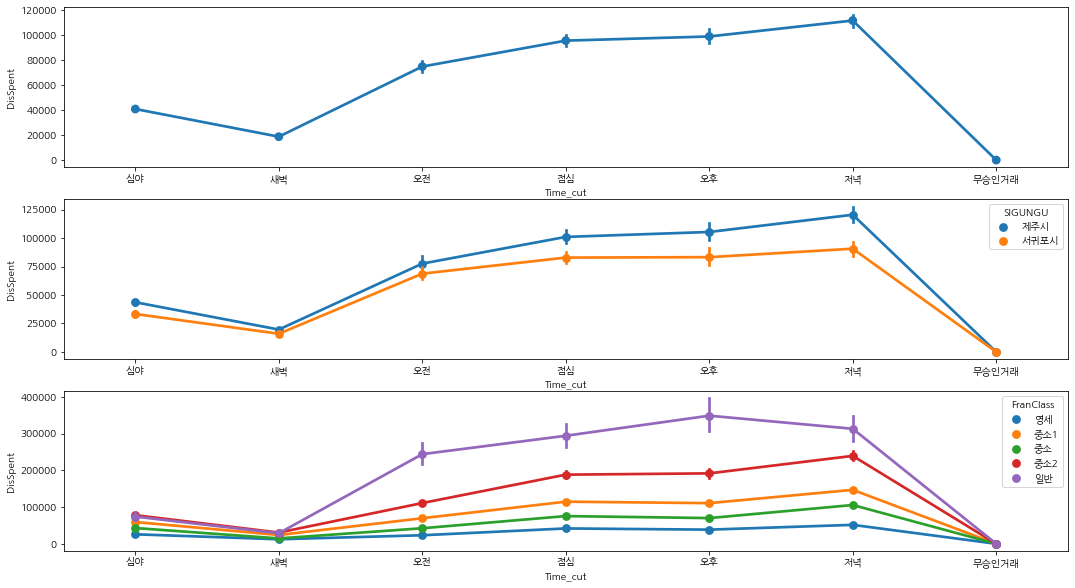

In [114]:
# 시간을 좀 넓게 바라보기
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18,10)


sns.pointplot(data=df_05, x="Time_cut", y="DisSpent", ax=ax1)
sns.pointplot(data=df_05, x="Time_cut",y= "DisSpent", hue="SIGUNGU", ax=ax2)
# sns.pointplot(data=df, x="Time", y="TotalSpent", hue="Type", ax=ax3)

sns.pointplot(data=df_05, x="Time_cut", y="DisSpent", hue="FranClass", ax=ax3)

<AxesSubplot:xlabel='Time_cut', ylabel='TotalSpent'>

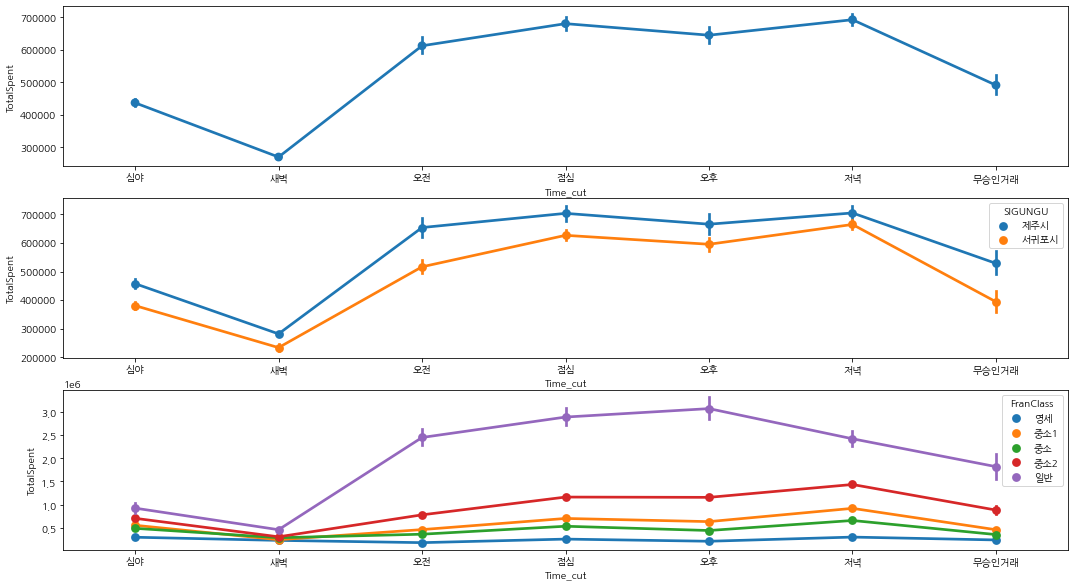

In [115]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18,10)


sns.pointplot(data=df, x="Time_cut", y="TotalSpent", ax=ax1)
sns.pointplot(data=df, x="Time_cut",y= "TotalSpent", hue="SIGUNGU", ax=ax2)
# sns.pointplot(data=df, x="Time", y="TotalSpent", hue="Type", ax=ax3)

sns.pointplot(data=df, x="Time_cut", y="TotalSpent", hue="FranClass", ax=ax3)

,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,TS-DS,NTS-NDS,Mts,Mds,population,Point_xy,Time_cut,lon,lat,lon_lat,url,add
0,제주특별자치도,제주시,영세,일반한식,00,502000,0,10,0,877005.9834,1.479766e+06,502000,10,50200.0,0.0,492072,"877005.9834,1479766.0730000006",심야,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,https://dapi.kakao.com/v2/local/geo/coord2regi...,한경면 고산리
1,제주특별자치도,제주시,영세,단란주점,00,1520000,0,8,0,877005.7447,1.479816e+06,1520000,8,190000.0,0.0,492072,"877005.7446999998,1479816.0489000005",심야,126.17888426813494,33.302765922881875,126.17888426813494_33.302765922881875,https://dapi.kakao.com/v2/local/geo/coord2regi...,한경면 고산리
2,제주특별자치도,제주시,중소1,편의점,00,482310,0,35,0,877056.6756,1.479616e+06,482310,35,13780.0,0.0,492072,"877056.6755999997,1479616.3842999993",심야,126.17945834265305,33.30097125427593,126.17945834265305_33.30097125427593,https://dapi.kakao.com/v2/local/geo/coord2regi...,한경면 고산리
3,제주특별자치도,제주시,영세,편의점,00,38050,5450,3,1,877055.9593,1.479766e+06,32600,2,12683.0,5450.0,492072,"877055.9593000001,1479766.3117999993",심야,126.17943027296923,33.302323149341944,126.17943027296923_33.302323149341944,https://dapi.kakao.com/v2/local/geo/coord2regi...,한경면 고산리
4,제주특별자치도,제주시,영세,일반한식,00,32000,32000,1,1,877055.4817,1.479866e+06,0,0,32000.0,32000.0,492072,"877055.4817000004,1479866.2634999994",심야,126.17941155823847,33.303224412837565,126.17941155823847_33.303224412837565,https://dapi.kakao.com/v2/local/geo/coord2regi...,한경면 고산리
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119349,제주특별자치도,제주시,영세,편의점,x,13700,0,2,0,950266.5976,1.502458e+06,13700,2,6850.0,0.0,492072,"950266.5976000002,1502457.6875000002",무승인거래,126.96449620673,33.51285447500651,126.96449620673_33.51285447500651,https://dapi.kakao.com/v2/local/geo/coord2regi...,NaN
1119350,제주특별자치도,제주시,영세,일반한식,x,56000,0,1,0,950317.5379,1.502258e+06,56000,1,56000.0,0.0,492072,"950317.5379,1502258.0074000007",무승인거래,126.96505576792752,33.51105588195606,126.96505576792752_33.51105588195606,https://dapi.kakao.com/v2/local/geo/coord2regi...,NaN
1119351,제주특별자치도,제주시,영세,일반한식,x,28000,0,1,0,950469.1585,1.501909e+06,28000,1,28000.0,0.0,492072,"950469.1584999998,1501908.8671000004",무승인거래,126.96670756246148,33.50791393813245,126.96670756246148_33.50791393813245,https://dapi.kakao.com/v2/local/geo/coord2regi...,NaN
1119352,제주특별자치도,제주시,중소1,중국음식,x,46000,0,3,0,950574.6388,1.500760e+06,46000,3,15333.0,0.0,492072,"950574.6387999997,1500759.8057000004",무승인거래,126.9679066314353,33.49755514050082,126.9679066314353_33.49755514050082,https://dapi.kakao.com/v2/local/geo/coord2regi...,NaN


In [164]:
def df_time_low(a,b,c):
    """a는 Type 중 하나를 입력
    b는 DisSpent or TotalSpent
    c는 시간을 문자열로"""
    df_temp= df[df['FranClass']==a].groupby(['Time','Type'])[b].sum()
    df_temp=pd.DataFrame(df_temp).sort_values(b, ascending=False)
    df_temp.reset_index(inplace=True)
    return df_temp[(df_temp['Time']==c) & (df_temp['DisSpent'] >0)].tail(10).reset_index(drop=True)

In [165]:
# 전체 시간별, Type별 하위 10개 총사용금액을 보여줌  
df_total=[]
for i in range(24):
    if i < 10:
        i= '0'+ str(i)
        df_temp = df_time_low('일반', 'DisSpent', i)
        df_total.append(df_temp)
    else:
        df_temp = df_time_low('일반', 'DisSpent', str(i))
        df_total.append(df_temp)

# pd.options.display.max_columns = len(pd.concat(df_total, axis=1).drop(['index'], axis=1).columns)    
pd.concat(df_total, axis=1)

,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent,Time,Type,DisSpent
0,00,의원,90000,01,주점,904170,02,기타레져업,131150,03,종합병원,839930,04,편의점,1254650,05,일반한식,572070,06,농기계,22000,07,조명기구,60000,08,위탁급식업,55500,09,기타의류,35000,10,아동의류,67600,11,주점,65500,12,카인테리어,35000,13,당구장,46200,14,치과병원,40000,15,CATV,68720,16,일반서적,85340,17,기타가구,40000,18,CATV,47730,19,1급호텔,60900,20,영화관,144500,21,영화관,95800,22,볼링장,84727,23,주차장,79050
1,00,중국음식,89000,01,스넥,353200,02,스넥,111300,03,주점,217300,04,일반한식,912100,05,화물운송,236220,06,건축요업품,21650,07,스포츠레져용품,51000,08,기타사무용,50000,09,세탁소,35000,10,기타의류,58000,11,가방,51560,12,관광여행,35000,13,주점,44500,14,보관창고업,38000,15,의료용품,66750,16,위탁급식업,85100,17,세차장,40000,18,사진관,44000,19,자동차시트타이어,55000,20,기타가구,142000,21,가정용품수리,72000,22,농협하나로클럽,82990,23,볼링장,73200
2,00,주차장,51600,01,일식회집,318000,02,LPG,59424,03,기타숙박업,70000,04,종합병원,713090,05,서양음식,81900,06,특급호텔,20000,07,동물병원,36000,08,스포츠레져용품,47000,09,정장,30000,10,일반서적,53500,11,일반서적,50000,12,보관창고업,33000,13,독서실,32050,14,주류판매점,35500,15,악세사리,53300,16,주점,80500,17,기타사무용,36000,18,기타유통업,40000,19,독서실,46980,20,미용재료,77500,21,부동산중개임대,65000,22,관광여행,77230,23,헬스크럽,65500
3,00,제과점,51000,01,LPG,272098,02,기타숙박업,50000,03,기타레져업,64500,04,주유소,260600,05,기타숙박업,50000,06,기념품점,20000,07,보일러펌프,28220,08,기타레져업,41000,09,기타사무용,30000,10,냉열기기,47388,11,소프트웨어,38200,12,견인서비스,32500,13,기타가구,31000,14,견인서비스,34000,15,기타가구,53000,16,단체복,56000,17,종합용역,32100,18,종합용역,39600,19,악세사리,45000,20,볼링장,62700,21,악세사리,64000,22,내의판매점,75000,23,영화관,53900
4,00,기타숙박업,38434,01,기타음료식품,218940,02,특급호텔,43740,03,스넥,64400,04,LPG,121587,05,수영장,47810,06,스포츠레져용품,17000,07,의원,27400,08,골프용품,30000,09,보관창고업,24000,10,기타사무용,38000,11,단체복,37000,12,기타사무용,30000,13,냉열기기,28050,14,기능학원,33600,15,부동산중개임대,48300,16,기타사무용,46000,17,문화취미기타,31400,18,티켓,38300,19,CATV,33600,20,의원,41600,21,기타가구,50000,22,미용원,40000,23,사무서비스,49000
5,00,기타음료식품,32830,01,기타레져업,147620,02,주차장,25400,03,당구장,43000,04,서양음식,79190,05,주점,22000,06,렌트카,14550,07,기타용역서비스,26000,08,티켓,27000,09,미용재료,21040,10,영화관,29900,11,부동산중개임대,24600,12,당구장,29900,13,일반서적,28000,14,보일러펌프,18000,15,레져용품수리,30000,16,냉열기기,40700,17,주류판매점,20100,18,일반서적,37500,19,주방용식기,20000,20,화원,40000,21,볼링장,49700,22,영화관,34730,23,중국음식,48000
6,00,영화관,15000,01,화장품,140000,02,당구장,21060,03,기타음료식품,35000,04,기타레져업,41500,05,사우나,16000,06,약국,11500,07,미용원,20000,08,관광여행,20000,09,한의원,14300,10,보일러펌프,20000,11,카메라,22000,12,일반서적,15000,13,관광여행,20000,14,사진관,17700,15,관광여행,24000,16,주방용식기,29000,17,레져용품수리,20000,18,한의원,26700,19,골프용품,17000,20,예체능학원,27440,21,사무서비스,21000,22,정육점,25860,23,2급호텔,40000
7,00,위탁급식업,10000,01,당구장,103000,02,기타음료식품,8100,03,콘도,22400,04,당구장,35000,05,기타업종,14500,06,주차장,10000,07,기타레져업,13000,08,유리,10400,09,치과병원,10000,10,주점,19500,11,기타가구,11000,12,카메라,12000,13,보관창고업,10070,14,사무서비스,12000,15,보관창고업,18400,16,보관창고업,23340,17,보일러펌프,16560,18,보관창고업,15270,19,기타가구,9000,20,비료농약사료종자,15000,21,기타의류,19900,22,의료용품,6750,23,골프용품,25000
8,00,사무서비스,10000,01,중국음식,49000,02,콘도,8000,03,주차장,22300,04,기타음료식품,1600,05,기타레져업,11500,06,기타레져업,5500,07,종합용역,11000,08,CATV,8230,09,일반가구,9900,10,부동산중개임대,12300,11,사진관,10000,12,주류판매점,11000,13,기타사무용,8000,14,기타사무용,11500,15,주류판매점,14000,16,사진관,14000,17,주방용구,15000,18,소프트웨어,8000,19,볼링장,8000,20,일반서적,10000,21,미용재료,7000,22,기타업종,6000,23,약국,1000
9,00,화물운송,2560,01,주차장,24000,02,애완동물,4500,03,LPG,20000,04,주차장,800,05,기계공구,9900,06,인테리어,5400,07,보관창고업,11000,08,애완동물,3000,09,통신기기,7000,10,주류판매점,12000,11,기타사무용,4000,12,주점,8000,13,여객선,6000,14,소프트웨어,1500,15,사진관,5000,16,볼링장,5300,17,볼링장,2000,18,미곡상,6000,19,한의원,6900,20,목재석재철물,7000,21,기타교육,1000,22,독서실,5000,23,기타용역서비스,700


In [169]:
df[df['TotalSpent'] < df['DisSpent']]

,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,TS-DS,NTS-NDS,Mts,Mds,population,Point_xy,Time_cut,lon,lat,lon_lat,url,add
36486,제주특별자치도,제주시,영세,치과병원,09,9300,18000,5,1,910031.1818,1.502764e+06,-8700,4,1860.0,18000.000000,492072,"910031.1818000004,1502764.2125000004",오전,126.53127298260794,33.512988788158694,126.53127298260794_33.512988788158694,https://dapi.kakao.com/v2/local/geo/coord2regi...,NaN
61150,제주특별자치도,제주시,중소1,내의판매점,11,47220,84730,2,1,906195.8642,1.500047e+06,-37510,1,23610.0,84730.000000,492072,"906195.8641999997,1500046.9394000003",점심,126.49026678345636,33.488153957625926,126.49026678345636_33.488153957625926,https://dapi.kakao.com/v2/local/geo/coord2regi...,NaN
95681,제주특별자치도,제주시,영세,서양음식,13,44000,108000,7,1,903938.4789,1.501785e+06,-64000,6,6286.0,108000.000000,492072,"903938.4789000003,1501785.3512999993",점심,126.46578468137557,33.50363091976089,126.46578468137557_33.50363091976089,https://dapi.kakao.com/v2/local/geo/coord2regi...,NaN
96533,제주특별자치도,제주시,중소2,약국,13,2100,4500,8,1,905047.3415,1.499842e+06,-2400,7,262.0,4500.000000,492072,"905047.3415,1499841.5110999998",점심,126.47792724113214,33.48620001443403,126.47792724113214_33.48620001443403,https://dapi.kakao.com/v2/local/geo/coord2regi...,NaN
104489,제주특별자치도,제주시,중소1,일반한식,13,3800,33000,7,4,911640.5524,1.500673e+06,-29200,3,543.0,8250.000000,492072,"911640.5524000005,1500672.8261999993",점심,126.54880591248356,33.494262120480435,126.54880591248356_33.494262120480435,https://dapi.kakao.com/v2/local/geo/coord2regi...,NaN
164775,제주특별자치도,서귀포시,중소,침구수예점,16,18000,170000,3,1,912919.6855,1.473590e+06,-152000,2,6000.0,170000.000000,181929,"912919.6854999997,1473590.3201",오후,126.56519070778894,33.25011994226535,126.56519070778894_33.25011994226535,https://dapi.kakao.com/v2/local/geo/coord2regi...,NaN
179536,제주특별자치도,제주시,중소2,스포츠의류,17,131600,148750,1,1,909531.6446,1.502712e+06,-17150,0,131600.0,148750.000000,492072,"909531.6446000001,1502711.8339000007",오후,126.52590025353722,33.51247424572645,126.52590025353722_33.51247424572645,https://dapi.kakao.com/v2/local/geo/coord2regi...,NaN
193468,제주특별자치도,제주시,일반,보습학원,18,300000,572620,1,1,904745.3174,1.500290e+06,-272620,0,300000.0,572620.000000,492072,"904745.3174,1500289.8685999997",저녁,126.47462904552985,33.490216548294306,126.47462904552985_33.490216548294306,https://dapi.kakao.com/v2/local/geo/coord2regi...,NaN
198589,제주특별자치도,제주시,일반,기타건축자재,18,17300,21600,5,1,909451.8462,1.498513e+06,-4300,4,3460.0,21600.000000,492072,"909451.8461999997,1498513.226",저녁,126.52546546496723,33.4746029632559,126.52546546496723_33.4746029632559,https://dapi.kakao.com/v2/local/geo/coord2regi...,NaN
202406,제주특별자치도,제주시,중소2,자동차시트타이어,18,42000,177000,3,1,911935.3795,1.501724e+06,-135000,2,14000.0,177000.000000,492072,"911935.3794999998,1501723.8010000007",저녁,126.55187603434769,33.50376456809342,126.55187603434769_33.50376456809342,https://dapi.kakao.com/v2/local/geo/coord2regi...,NaN


In [175]:
df

,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,TS-DS,NTS-NDS,Mts,Mds,population,Point_xy,Time_cut
0,202006,제주특별자치도,제주시,영세,일반한식,00,502000,0,10,0,877005.9834,1.479766e+06,502000,10,50200.0,0.0,492072,"877005.9834,1479766.0730000006",심야
1,202006,제주특별자치도,제주시,영세,단란주점,00,1520000,0,8,0,877005.7447,1.479816e+06,1520000,8,190000.0,0.0,492072,"877005.7446999998,1479816.0489000005",심야
2,202006,제주특별자치도,제주시,중소1,편의점,00,482310,0,35,0,877056.6756,1.479616e+06,482310,35,13780.0,0.0,492072,"877056.6755999997,1479616.3842999993",심야
3,202006,제주특별자치도,제주시,영세,편의점,00,38050,5450,3,1,877055.9593,1.479766e+06,32600,2,12683.0,5450.0,492072,"877055.9593000001,1479766.3117999993",심야
4,202006,제주특별자치도,제주시,영세,일반한식,00,32000,32000,1,1,877055.4817,1.479866e+06,0,0,32000.0,32000.0,492072,"877055.4817000004,1479866.2634999994",심야
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119349,202008,제주특별자치도,제주시,영세,편의점,x,13700,0,2,0,950266.5976,1.502458e+06,13700,2,6850.0,0.0,492072,"950266.5976000002,1502457.6875000002",무승인거래
1119350,202008,제주특별자치도,제주시,영세,일반한식,x,56000,0,1,0,950317.5379,1.502258e+06,56000,1,56000.0,0.0,492072,"950317.5379,1502258.0074000007",무승인거래
1119351,202008,제주특별자치도,제주시,영세,일반한식,x,28000,0,1,0,950469.1585,1.501909e+06,28000,1,28000.0,0.0,492072,"950469.1584999998,1501908.8671000004",무승인거래
1119352,202008,제주특별자치도,제주시,중소1,중국음식,x,46000,0,3,0,950574.6388,1.500760e+06,46000,3,15333.0,0.0,492072,"950574.6387999997,1500759.8057000004",무승인거래
